In [1]:
!pip install opencv-python

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import math

In [3]:
# Subroutine for loading an image
# Any pixel with value >= 128 is set to +1
# Any pixel with value < 128 is set to -1
def load_image(filename):
    img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    img = img/255.0
    img[img>=0.5]=1.0
    img[img<0.5]=0.0
    img = img*2-1
    return img

# Load in both the degraded image and the original
img = load_image("noisy_bear.png")
gt = load_image("original_bear.png")
M,N = img.shape[0], img.shape[1]

# Create a version of img that is padded with zeros all around
padded_image = np.zeros((img.shape[0]+2, img.shape[1]+2)) #Padding image to make some computations easier 
padded_image[1:-1,1:-1] = img

In [6]:
def compute_prob(X,Y,p):
    prob_pos = math.exp(X[p[0]][p[1]])
    prob_neg = math.exp(-X[p[0]][p[1]])
    
    row_add = [0,1,-1,0]
    col_add = [-1,0,0,1]
    
    for i in range(4):
        r = p[0] + row_add[i]
        c = p[1] + col_add[i]
        
        prob_pos *= math.exp(Y[r][c])
        prob_neg *= math.exp(-Y[r][c])
    
    return (prob_pos)/(prob_pos+prob_neg)

In [61]:
rec = np.random.choice(a=[-1,1],size = (62,62)) 

padded_rec = np.zeros((rec.shape[0]+2, rec.shape[1]+2)) #Padding image to make some computations easier 
padded_rec[1:-1,1:-1] = rec

In [73]:
X = padded_image
Y = padded_rec.copy()
samples = []
max_iter = 100000
for iter in range(max_iter):
    pixel = np.random.choice(a=[j+1 for j in range(62)],size = 2)
    prob = compute_prob(X,Y,pixel)
    #print(prob)
    pixelval = np.random.choice(a=[-1,1],p=[1-prob,prob])
    #print(pixelval)
    Y[pixel[0]][pixel[1]] = pixelval
    samples.append(Y.copy())
#     if(iter%20000==0):
#         fig = plt.figure(figsize=(4, 4))
#         plt.imshow(Y)
#         plt.show()
        
    
    

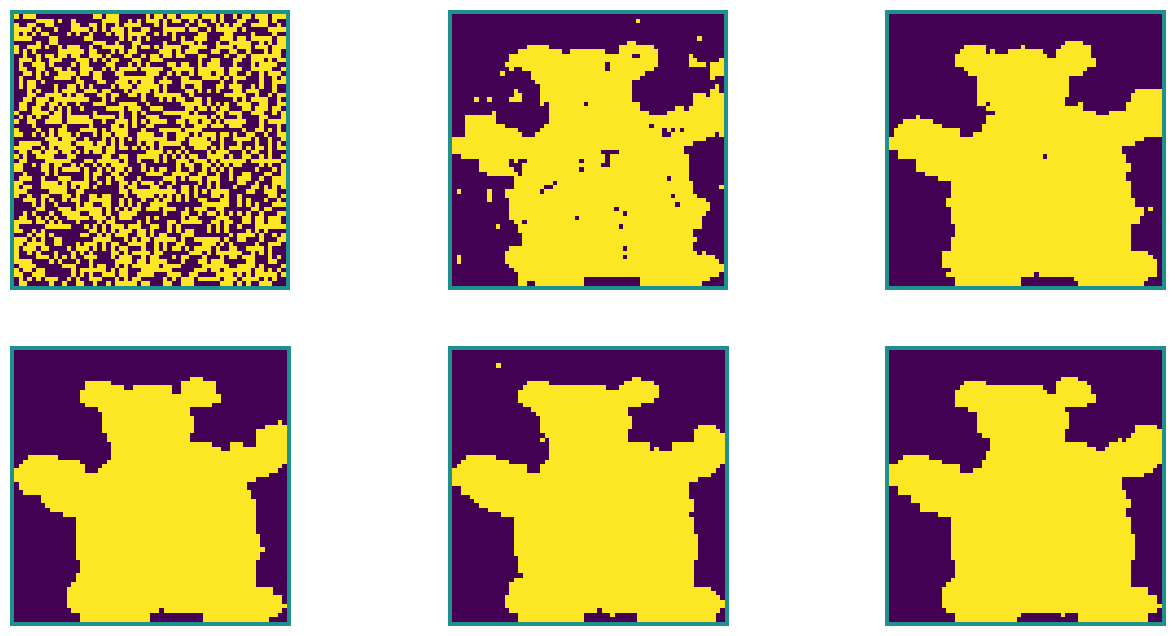

In [69]:
fig = plt.figure(figsize=(16, 8)) 
  
# setting values to rows and column variables 
rows = 2
columns = 3
 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(samples[0]) 
plt.axis('off') 

  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(samples[int(max_iter/5)]) 
plt.axis('off') 

  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(samples[2*int(max_iter/5)])
plt.axis('off') 

  
# Adds a subplot at the 4th position 
fig.add_subplot(rows, columns, 4) 
  
# showing image 
plt.imshow(samples[3*int(max_iter/5)]) 
plt.axis('off') 
 

fig.add_subplot(rows, columns, 5)  
plt.imshow(samples[4*int(max_iter/5)]) 
plt.axis('off') 

fig.add_subplot(rows, columns, 6)  
plt.imshow(samples[max_iter-1]) 
plt.axis('off')

plt.show()

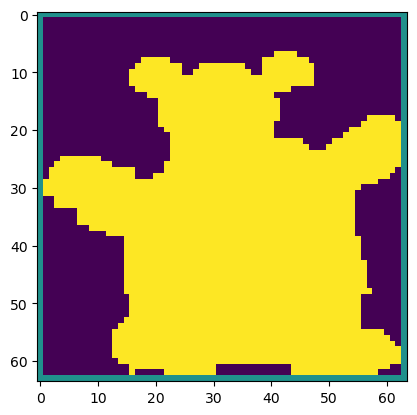

In [72]:
expect = sum(samples)*1.0/max_iter
expect[expect>0]=1.0
expect[expect<0]=-1.0
#expect
plt.imshow(expect)
plt.show()

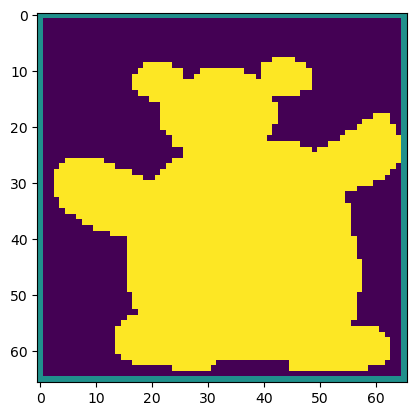

In [32]:
padded_gt = np.zeros((gt.shape[0]+2, gt.shape[1]+2)) #Padding image to make some computations easier 
padded_gt[1:-1,1:-1] = gt
plt.imshow(padded_gt)
plt.show()